# PREDICTION DES RETARDS DE VOL

## SOMMAIRE
- Introduction
- Rappel détaillée des colonnes
- Résumé de l'exploration des données
- Analyse
  - Import des librairies 
  - Chargement des données
  - Nettoyage des données
  - Analyse de la forme des données
    - Types de données
    - Heatmap
  - Analyse de fond
    - Supression des colonnes non utilisables
    - Examen de la colonne target
    - Histogrames des variables continues
      - Variables quantitatives (float)
      - Variables quantitatives (interger)
      - Variables qualitatives (object)
    - Correlation des variables
  - Hypothèses


---

## INTRODUCTION

Les retards de vols constituent une problématique majeure dans le secteur aérien, impactant non seulement les passagers, mais aussi les compagnies aériennes et les aéroports. Selon le Bureau of Transportation Statistics des États-Unis, environ 19 % des vols ont été retardés en 2019, engendrant des coûts économiques estimés à 28 milliards de dollars. \
Face à cette complexité, le recours à des approches basées sur les données, telles que l’analyse prédictive, devient essentiel pour anticiper et gérer efficacement les retards. \
C’est dans cette optique que le Bureau of Transportation Statistics a mis à disposition un jeu de données, sur lequel nous allons mener une analyse approfondie afin de déterminer s’il est possible d’entraîner un modèle de prédiction des retards de vols, et le cas échéant, d’identifier la meilleure approche à adopter.

---

## RAPPEL DÉTAILLÉE DES COLONNES

Variables temporelles
- **​DAY_OF_WEEK** : Jour de la semaine (1 = lundi, 7 = dimanche)​
- **​FL_DATE** : Date complète du vol (format AAAA-MM-JJ)​​

Informations sur le vol
- **​UNIQUE_CARRIER** : Code unique du transporteur (ex. : 'AA' pour American Airlines)​
- **​AIRLINE_ID** : Identifiant numérique de la compagnie aérienne​
- **​CARRIER** : Code du transporteur​
- **​TAIL_NUM** : Numéro de queue de l'avion​
- **​FL_NUM** : Numéro du vol​

Aéroport d'origine
- **​ORIGIN_AIRPORT_ID** : Identifiant de l'aéroport d'origine​
- **​ORIGIN_AIRPORT_SEQ_ID** : Identifiant de séquence de l'aéroport d'origine​
- **​ORIGIN_CITY_MARKET_ID** : Identifiant du marché de la ville d'origine​
- **​ORIGIN** : Code IATA de l'aéroport d'origine (ex. : 'JFK')​
- **​ORIGIN_CITY_NAME** : Nom de la ville d'origine​
- **​ORIGIN_STATE_ABR** : Abréviation de l'État d'origine​
- **​ORIGIN_STATE_FIPS** : Code FIPS de l'État d'origine​
- **​ORIGIN_STATE_NM** : Nom complet de l'État d'origine​
- **​ORIGIN_WAC** : Code de zone de l'aéroport d'origine​​

Aéroport de destination
- **DEST_AIRPORT_ID** : Identifiant de l'aéroport de destination​
- **​DEST_AIRPORT_SEQ_ID** : Identifiant de séquence de l'aéroport de destination​
- **​DEST_CITY_MARKET_ID** : Identifiant du marché de la ville de destination​
- **​DEST** : Code IATA de l'aéroport de destination​
- **​DEST_CITY_NAME** : Nom de la ville de destination​
- **​DEST_STATE_ABR** : Abréviation de l'État de destination​
- **​DEST_STATE_FIPS** : Code FIPS de l'État de destination​
- **​DEST_STATE_NM** : Nom complet de l'État de destination​
- **​DEST_WAC** : Code de zone de l'aéroport de destination​

Horaires et retards
- **​CRS_DEP_TIME** : Heure de départ prévue (au format HHMM)​
- **​DEP_TIME** : Heure réelle de départ​
- **​DEP_DELAY** : Retard au départ en minutes (négatif si en avance)​
- **​DEP_DELAY_NEW** : Retard au départ, avec 0 pour les retards ≤ 0​
- **​DEP_DEL15** : Indicateur de retard au départ ≥ 15 minutes (1 = oui, 0 = non)​
- **​DEP_DELAY_GROUP** : Groupe de retard au départ (par tranches de 15 minutes)​
- **​DEP_TIME_BLK** : Plage horaire du départ (ex. : '0600-0659')​
- **​TAXI_OUT** : Temps de roulage avant le décollage (en minutes)​
- **​WHEELS_OFF** : Heure de décollage (roues quittant le sol)​
- **​WHEELS_ON** : Heure d'atterrissage (roues touchant le sol)​
- **​TAXI_IN** : Temps de roulage après l'atterrissage (en minutes)​
- **​CRS_ARR_TIME** : Heure d'arrivée prévue​
- **​ARR_TIME** : Heure réelle d'arrivée​
- **​ARR_DELAY** : Retard à l'arrivée en minutes​
- **​ARR_DELAY_NEW** : Retard à l'arrivée, avec 0 pour les retards ≤ 0​
- **​ARR_DEL15** : Indicateur de retard à l'arrivée ≥ 15 minutes (1 = oui, 0 = non)​
- **​ARR_DELAY_GROUP** : Groupe de retard à l'arrivée (par tranches de 15 minutes)​
- **​ARR_TIME_BLK** : Plage horaire de l'arrivée (ex. : '0900-0959')​

Annulations et détournements
- **CANCELLED** : Indicateur d'annulation du vol (1 = oui, 0 = non)​
- **​CANCELLATION_CODE** : Code de la raison de l'annulation (A = transporteur, B = météo, C =NAS, D = sécurité)​
- **DIVERTED** : Indicateur de vol détourné (1 = oui, 0 = non)​​

Durées et distances
- **​CRS_ELAPSED_TIME** : Durée prévue du vol (en minutes)​
- **​ACTUAL_ELAPSED_TIME** : Durée réelle du vol (en minutes)​
- **​AIR_TIME** : Temps de vol effectif (en minutes)

---

## RÉSUMÉ DE L'EXPLORATION DES DONNÉES

Ici, nous présenterons l’ensemble des informations que nous jugeons importantes à préciser. Il s’agira en quelque sorte du résumé final de notre analyse.

#### Objectif :
- Comprendre du mieux possible nos données
- Développer une première stratégie de modélisation 

#### Analyse de Forme :
- **Variable target** : ARR_DEL15 
- **Lignes et colonnes** : 1 111 240 lignes et 32 colonnes
- **Types de variables** : Qualitatives : 8, Quantitatives : 23
- **Analyse des valeurs manquantes** :
  - Le dataset est plutot complet. Il y assez peu de valeurs NaN.
  - Seulement 8 colonnes sur 31 ne pourrons pas être utilisés car taux de NaN supérieur à 90%
    - CARRIER_DELAY
    - LATE_AIRCRAFT_DELAY
    - WEATHER_DELAY
    - NAS_DELAY
    - SECURITY_DELAY
    - FIRST_DEP_TIME
    - TOTAL_ADD_GTIME
    - LONGEST_ADD_GTIME

#### Analyse de Fond :
- **Visualisation de la target** :
  - 17 % des vols sont en retard de plus de 15 minutes
  - 193 688 vols en retard sur un total de 1 111 240.

- **Signification des variables** :

  - **Redondances** : 
    - UNIQUE_CARRIER / CARRIERE
    - ORIGIN / ORIGIN_CITY_NAME
    - ORIGIN_STATE / ORIGIN_STATE_NM : 
    - DEST / DEST_CITY_NAME : 
    - DEST_STATE_ABR / DEST_STATE_NM : 


  - **Variables clés** :
    - DEP_DELAY, ARR_DELAY, DEP_DEL15, ARR_DEL15 : mesures principales du retard.
    - DEP_TIME_BLK, ARR_TIME_BLK : plages horaires normalisées. Utiles pour catégoriser le trafic.
    - UNIQUE_CARRIER, ORIGIN, DEST : identifiants des compagnies et des aéroports — très corrélés aux retards dans certains cas.

- **Relation Variables / Target** :
  - DEP_DELAY, DEP_DEL15 : fortement corrélés avec ARR_DEL15. Un retard au départ mène souvent à un retard à l’arrivée.
  - DEP_DELAY_GROUP : même logique — plus le groupe est élevé, plus la probabilité de retard augmente.
  - ARR_DELAY, ARR_DELAY_NEW, ARR_TIME, WHEELS_ON : variables connues après le vol → fuites de données, donc à exclure comme features.
  - CANCELLED, DIVERTED : peu fréquents mais biaisants (pas d’arrivée mesurable) → à filtrer en amont.
  - DEP_TIME_BLK, ARR_TIME_BLK : certaines plages horaires (ex. matin et soir) sont plus sujettes aux retards → feature intéressante.
  - DISTANCE, DISTANCE_GROUP : impacte la probabilité de retard, mais de manière non linéaire (pas toujours plus de retard sur les longs vols).
  - ORIGIN, DEST : certains aéroports (grands hubs, météo difficile) génèrent plus de retards que d’autres.

- **NaN analyse** : 
  - Présence de valeurs manquantes dans : ARR_TIME, ARR_DELAY, WHEELS_ON, TAXI_IN, souvent liées à des vols annulés ou détournés

#### Hypotheses : 

- ✅ H1 : Retards selon la plage horaire de départ (DEP_TIME_BLK)
- ✅ H2 : Retards selon la compagnie (UNIQUE_CARRIER)
- ✅ H3 : Retards selon l'aéroport d’origine (ORIGIN)
- ✅ H4 : Retards selon le jour de la semaine (DAY_OF_WEEK)
- ✅ H5 : Retards selon le mois (MONTH)
- ❌ H6 : Plus la distance d’un vol est grande, plus il a de risques d’être en retard (DISTANCE_GROUP)

---

## ANALYSE

### IMPORT DES LIBRAIRIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from skimpy import skim

---

### CHARGEMENT DES DONNÉES

Nos données sont réparties dans plusieurs fichiers (un fichier par mois de l’année 2016). \
Nous allons donc, dans un premier temps, essayer d'agréger l'ensemble des csv à notre disposition dans un seul et unique dataframe (csv)

In [2]:
# Panda library display setting for greater visual comfort
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load all CSVs into the "dfs" variable
dfs = []

for month in range(1, 13):
    file = f"data/2016_{month:02}.csv"
    try:
        tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)
        dfs.append(tmp)
        print(f"Loaded {file} ✅")
    except pd.errors.ParserError as e:
        print(f"ParserError for {file}: {e}")
    print("-" * 50)

Loaded data/2016_01.csv ✅
--------------------------------------------------
Loaded data/2016_02.csv ✅
--------------------------------------------------
Loaded data/2016_03.csv ✅
--------------------------------------------------


/tmp/ipykernel_301211/4025934662.py:7: ParserWarning: Skipping line 121012: expected 65 fields, saw 75
Skipping line 386249: expected 65 fields, saw 83
Skipping line 388291: expected 65 fields, saw 78
Skipping line 389371: expected 65 fields, saw 72
Skipping line 389548: expected 65 fields, saw 81
Skipping line 453858: expected 65 fields, saw 97

  tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)


Loaded data/2016_04.csv ✅
--------------------------------------------------
Loaded data/2016_05.csv ✅
--------------------------------------------------
Loaded data/2016_06.csv ✅
--------------------------------------------------
Loaded data/2016_07.csv ✅
--------------------------------------------------
Loaded data/2016_08.csv ✅
--------------------------------------------------
Loaded data/2016_09.csv ✅
--------------------------------------------------
Loaded data/2016_10.csv ✅
--------------------------------------------------
Loaded data/2016_11.csv ✅
--------------------------------------------------
Loaded data/2016_12.csv ✅
--------------------------------------------------


In [4]:
# Concat all dataframes in "full_df"
full_df = pd.concat(dfs, ignore_index=True)

---

### NETTOYAGE DES DONNÉES

On commence par uniformiser le nom des colonnes (ex: Origin_CITY_NAME -> ORIGIN_CITY_NAME)

In [5]:
# Standardize column names
full_df.columns = [col.strip().upper() for col in full_df.columns]

On regarde maitenant les différents types que l'on peut avoir dans notre dataset

In [6]:
# Check columns types
full_df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of YEAR                      object
QUARTER                   object
MONTH                      int64
DAY_OF_MONTH              object
DAY_OF_WEEK               object
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
TAIL_NUM                  object
FL_NUM                    object
ORIGIN_AIRPORT_ID         object
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID     object
ORIGIN                    object
ORIGIN_CITY_NAME          object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS        float64
ORIGIN_STATE_NM           object
ORIGIN_WAC                object
DEST_AIRPORT_ID           object
DEST_AIRPORT_SEQ_ID       object
DEST_CITY_MARKET_ID       object
DEST                      object
DEST_CITY_NAME            object
DEST_STATE_ABR            object
DEST_STATE_FIPS          float64
DEST_STATE_NM             object
DEST_WAC                 float64

Ou en utilisant un graphique

<Axes: ylabel='count'>

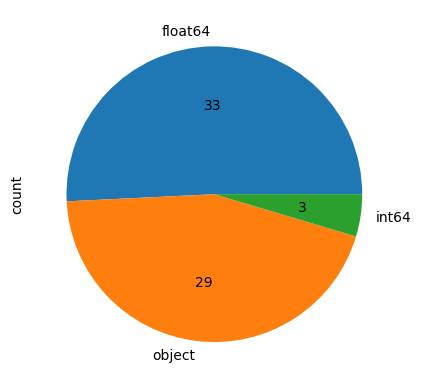

In [7]:
full_df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * full_df.dtypes.value_counts().sum() / 100))

Certaines colonnes présentant des types inadaptés, un prétraitement des données est requis avant modélisation.

Les colonnes suivantes sont nettoyées puis converties en type entier (int) afin d’assurer une cohérence et d'optimiser l'entrainement de notre futur model

- MONTH
- DAY_OF_MONTH
- DAY_OF_WEEK"

In [8]:
# Transform date column to integer
columns_to_convert = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK']

for col in columns_to_convert:
    if col in full_df.columns:
        # Remove white space
        full_df[col] = full_df[col].astype(str).str.strip()

        # Convert to numeric
        full_df[col] = pd.to_numeric(full_df[col], errors='coerce')

        # Force type to int
        full_df[col] = full_df[col].astype('Int64')


Ensuite on nettoie les colonnes qui ne sont pas des nombres (float, int) en retirant les espaces et les erreurs de formatage

In [9]:
# Convert all non-float columns to string (explicit string values, will be quoted when saving)
for col in full_df.columns:
    if not (pd.api.types.is_float_dtype(full_df[col]) or pd.api.types.is_integer_dtype(full_df[col])):
        # Remove white space
        full_df[col] = full_df[col].astype(str).str.strip()
        # Force type to string
        full_df[col] = full_df[col].astype(str)

Comme la colonne ARR_DEL15 représente la variable cible, les lignes où cette valeur est manquante ne peuvent pas être utilisées pour l'entraînement. Elles sont donc supprimées.

In [10]:
# Drop rows with missing target
full_df = full_df.dropna(subset=['ARR_DEL15'])

En réfléchissant à la signification de certaines colonnes, on constate que plusieurs d'entre elles ne seront pas utiles pour prédire un retard de plus de 15 minutes.
Nous choisissons donc de les retirer de notre jeu de données.

Suppression des lignes où les vols sont annulés (CANCELLED) ou détournés (DIVERTED).
Notre objectif étant de prédire un retard, les vols qui n'ont jamais décollé ou qui ont été déviés ne sont pas pertinents pour l'entraînement du modèle et risquent de biaiser les résultats.

In [11]:
# Keep only flights that were not cancelled or diverted
full_df = full_df[(full_df['CANCELLED'] != 1.0) & (full_df['DIVERTED'] != 1.0)]

Suppression des colonnes suivantes :

- FL_DATE : \
Risque de sur-apprentissage, car la date a déjà été décomposée en plusieurs colonnes (MONTH, DAY_OF_WEEK, DAY_OF_MONTH).

- TAIL_NUM : \
Identifiant unique de l’avion, violation RGPD

- FL_NUM : \
Numéro de vol, violation RGPD

- ORIGIN_CITY_NAME, DEST_CITY_NAME : \
Redondance avec ORIGIN, DEST

- ORIGIN_STATE_NM, DEST_STATE_NM : \
Redondance avec STATE_ABR, FIPS

- DEP_TIME, WHEELS_OFF, WHEELS_ON, ARR_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DELAY_GROUP, DEP_DEL15, ACTUAL_ELAPSED_TIME, AIR_TIME : \
Connus après le vol, peu biaiser la prédiction

- ARR_DELAY, ARR_DELAY_NEW, ARR_DELAY_GROUP, ARR_TIME_BLK : \
Ce sont des dérivés directs de la variable cible ARR_DEL15. Les garder biaiserait fortement la prédiction.

- CANCELLED, DIVERTED, CANCELLATION_CODE : \
Les lignes concernées ont déjà été supprimées en amont, ces colonnes deviennent donc inutiles.

- 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID' : \
Identifiants techniques ou non interprétables

- FLIGHTS :
Aucune information sur la donnée

- CARRIER :
Redondance avec 'UNIQUE_CARRIER'

In [12]:
# Drop columns that cause leakage or are redundant
cols_to_drop = [
    'FL_DATE',

    'TAIL_NUM', 'FL_NUM',

    'AIRLINE_ID',
    'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
    'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',

    'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM',
    'DEST_CITY_NAME', 'DEST_STATE_NM',
   
    'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_TIME',
    'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP', 'DEP_DEL15',
    'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
    'ACTUAL_ELAPSED_TIME', 'AIR_TIME',

    'CANCELLED', 'DIVERTED', 'CANCELLATION_CODE',

    'FLIGHTS',

    'CARRIER',

    'UNNAMED: 64'
]

full_df = full_df.drop(columns=[col for col in cols_to_drop if col in full_df.columns])

Afin de réduire la taille du jeu de données, nous sélectionnons un échantillon de 20 %, tout en conservant la distribution de la variable cible (ARR_DEL15) grâce à un échantillonnage stratifié.

In [13]:
# Stratified sampling (keep class distribution of ARR_DEL15)
data = train_test_split(
    full_df,
    test_size=0.2,
    stratify=full_df['ARR_DEL15'],
    random_state=42
)[1].reset_index(drop=True)

In [14]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME_BLK,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2016,2,4,28,4,B6,MSY,LA,22.0,72,JFK,NY,36.0,22.0,1000.0,1000-1059,20.00,4.0,1352.0,0.0,172.0,1182.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,4,10,3,1,UA,CLE,OH,39.0,44,ORD,IL,17.0,41.0,1100.0,1100-1159,13.0,14.0,1125.0,0.0,85.0,316.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,3,9,12,1,OO,SFO,CA,6.0,91,SMF,CA,6.0,91.0,2300.0,2300-2359,21.0,5.0,2349.0,0.0,49.0,86.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,3,15,2,OO,SFO,CA,6.0,91,TUS,AZ,4.0,81.0,1933.0,1900-1959,14.0,4.0,2144.0,0.0,131.0,751.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,3,8,11,4,AA,DFW,TX,48.0,74,SAT,TX,48.0,74.0,1755.0,1700-1759,9.0,3.0,1859.0,0.0,64.0,247.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1111240 │ │ float64     │ 18    │                                                         │
│ │ Number of columns │ 31      │ │ string      │ 8     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 5     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA      ┃ NA %            ┃ mean    ┃ sd     ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ YEAR            │       0 │               0 │    2016 │      0 │ 2016 │ 2016 │ 2016 │ 2016 │ 2016 │     █  │  │
│ │ QUARTER         │       0 │               0 │   2.493 │  1.123 │    1 │    1 │    3 │    3 │    4 │ █ ▇ ██ │  │
│ │ MONTH           │       0 │               0 │   6.519 │  3.415 │    1 │    3 │    7 │    9 │   12 │ ▇████▇ │  │
│ │ DAY_OF_MONTH    │       0 │               0 │   15.82 │    8.8 │    1 │    8 │   16 │   23 │   31 │ ▇▇▇▇▇█ │  │
│ │ DAY_OF_WEEK     │       0 │               0 │   3.927 │  1.985 │    1 │    2 │    4 │    6 │    7 │ ▅▄▅▅▅█ │  │
│ │ ORIGIN_STATE_FI │       0 │               0 │   25.68 │  16.66 │    1 │   12 │   24 │   40 │   78 │ █▄▄▄▁  │  │
│ │ PS              │         │                 │         │        │      │      │      │      │      │        │  │
│ │ DEST_STATE_FIPS │       0 │               0 │   25.68 │  16.64 │    1 │   12 │   24 │   40 │   78 │ █▄▄▄▁  │  │
│ │ DEST_WAC        │       0 │               0 │   55.76 │  26.98 │    1 │   34 │   52 │   82 │   93 │ ▁▂█▁▄▇ │  │
│ │ CRS_DEP_TIME    │       0 │               0 │    1330 │  489.4 │    1 │  915 │ 1325 │ 1735 │ 2359 │  ▅███▃ │  │
│ │ TAXI_IN         │       0 │               0 │   7.443 │  5.665 │    1 │    4 │    6 │    9 │  205 │   █    │  │
│ │ CRS_ARR_TIME    │       0 │               0 │    1490 │  515.8 │    1 │ 1105 │ 1520 │ 1919 │ 2400 │ ▁▂▇██▇ │  │
│ │ ARR_DEL15       │       0 │               0 │  0.1743 │ 0.3794 │    0 │    0 │    0 │    0 │    1 │ █    ▂ │  │
│ │ CRS_ELAPSED_TIM │       0 │               0 │   145.3 │  76.37 │   18 │   88 │  126 │  178 │  705 │  █▅▁   │  │
│ │ E               │         │                 │         │        │      │      │      │      │      │        │  │
│ │ DISTANCE        │       0 │               0 │   849.2 │  619.2 │   30 │  391 │  678 │ 1091 │ 4983 │  █▄▁   │  │
│ │ DISTANCE_GROUP  │       0 │               0 │   3.869 │  2.435 │    1 │    2 │    3 │    5 │   11 │ ██▂▂▁▁ │  │
│ │ CARRIER_DELAY   │  917552 │ 82.570101868183 │   20.49 │  58.22 │    0 │    0 │    2 │   18 │ 1964 │   █    │  │
│ │                 │         │              29 │         │        │      │      │      │      │      │        │  │
│ │ WEATHER_DELAY   │  917552 │ 82.570101868183 │   2.775 │  21.84 │    0 │    0 │    0 │    0 │ 1064 │   █    │  │
│ │                 │         │              29 │         │        │      │      │      │      │      │        │  │
│ │ NAS_DELAY       │  917552 │ 82.570101868183 │   14.6

On fait une copie de notre dataset pour conserver le jeu de données initial sous la main

In [16]:
df = data.copy()

---

### ANALYSE DE LA FORME DES DONNÉES

#### TYPES DE DONNÉES

On commence par regarder les dimensions de notre dataset

In [17]:
df.shape

(1111240, 31)

Nous avons donc : 
 - 1111240 lignes.
 - 31 colonnes

Ensuite on regarde le type de nos données

<Axes: ylabel='count'>

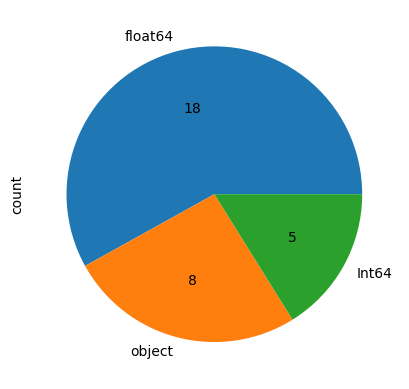

In [18]:
df.dtypes.value_counts().plot.pie(autopct=lambda p: '{:.0f}'.format(p * df.dtypes.value_counts().sum() / 100))

Nous avons donc 
- Qualitatives : (18 + 5) = 23
- Quantitatives : 8

---

#### HEATMAP

On regarde maintenant le taux de valeurs manquantes dans notre dataset à l'aide d'une heatmap

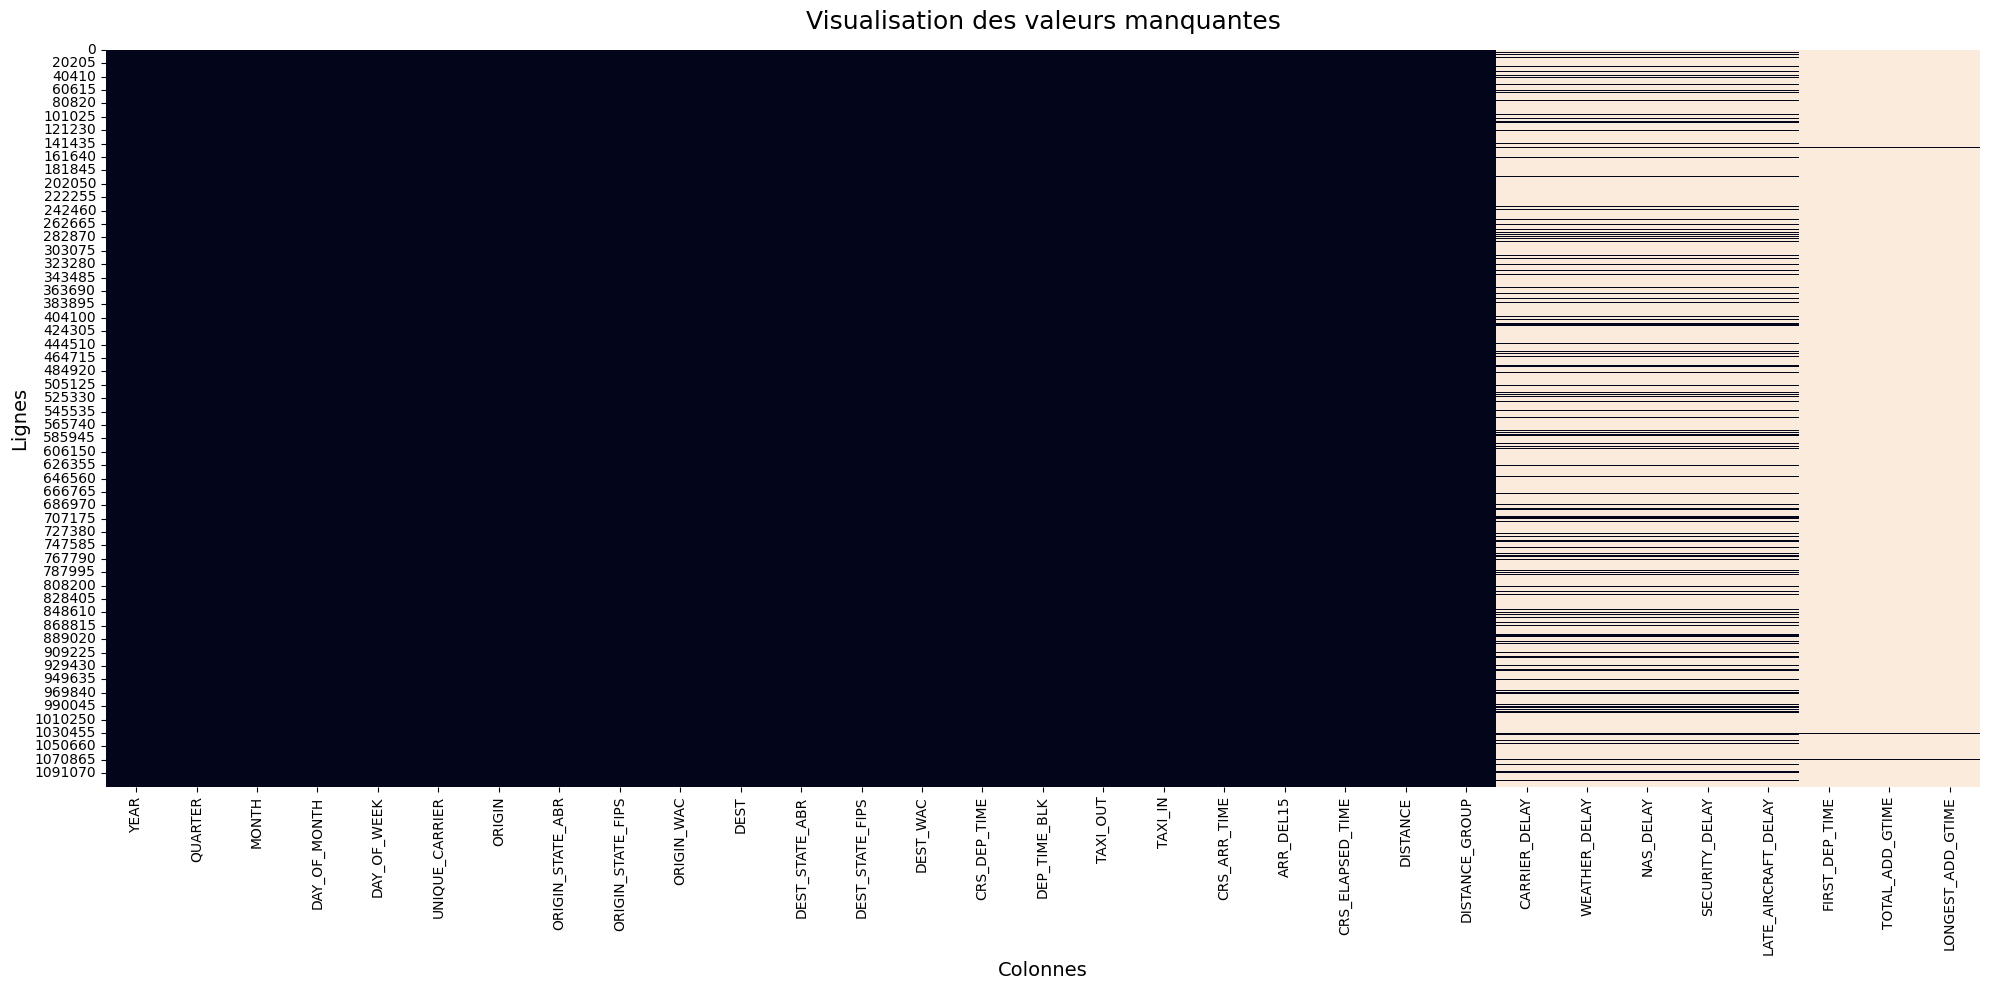

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.title("Visualisation des valeurs manquantes", fontsize=18, pad=15)
plt.xlabel("Colonnes", fontsize=14)
plt.ylabel("Lignes", fontsize=14)
plt.tight_layout()
plt.show()

Puis on ordonne les colonnes par taux de valeurs manquantes (de la colonne la plus complète à la moins complète) 

In [20]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

YEAR                   0.000000
QUARTER                0.000000
MONTH                  0.000000
DAY_OF_MONTH           0.000000
DAY_OF_WEEK            0.000000
UNIQUE_CARRIER         0.000000
ORIGIN                 0.000000
ORIGIN_STATE_ABR       0.000000
ORIGIN_STATE_FIPS      0.000000
ORIGIN_WAC             0.000000
DEST                   0.000000
DEST_STATE_ABR         0.000000
DEST_STATE_FIPS        0.000000
DEST_WAC               0.000000
CRS_DEP_TIME           0.000000
DEP_TIME_BLK           0.000000
TAXI_OUT               0.000000
TAXI_IN                0.000000
CRS_ARR_TIME           0.000000
ARR_DEL15              0.000000
CRS_ELAPSED_TIME       0.000000
DISTANCE               0.000000
DISTANCE_GROUP         0.000000
CARRIER_DELAY          0.825701
WEATHER_DELAY          0.825701
NAS_DELAY              0.825701
SECURITY_DELAY         0.825701
LATE_AIRCRAFT_DELAY    0.825701
FIRST_DEP_TIME         0.994121
TOTAL_ADD_GTIME        0.994121
LONGEST_ADD_GTIME      0.994121
dtype: f

On peut voir ici 2 groupes de données
- Données manquantes 80 % et plus
- Données manquantes 0%

---

### ANALYSE DE FOND

#### SUPPRESION DES COLONNES NON UTILISABLES

On retire les colonnes qui ont un taux de valeurs manquantes supérieur à 80% car cela s'avère compliqué de travailler avec aussi peu d'informations.

In [21]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.8]]

---

#### EXAMEN DE LA COLONNE TARGET

On commence par observer la tendance de notre variable target

In [22]:
df['ARR_DEL15'].value_counts()

ARR_DEL15
0.0    917552
1.0    193688
Name: count, dtype: int64

In [23]:
df['ARR_DEL15'].value_counts(normalize=True)

ARR_DEL15
0.0    0.825701
1.0    0.174299
Name: proportion, dtype: float64

On remarque ici que notre colonne target comporte 
- 193 688 avions en retard
- 917 552 avions à l'heure

---

#### HISTOGRAMES DES VARIABLES CONTINUES

Pour mieux comprendre la distribution de nos données, nous allons tracer des histogrames des différentes colonnes

##### VARIABLES QUANTITATIVES (float)

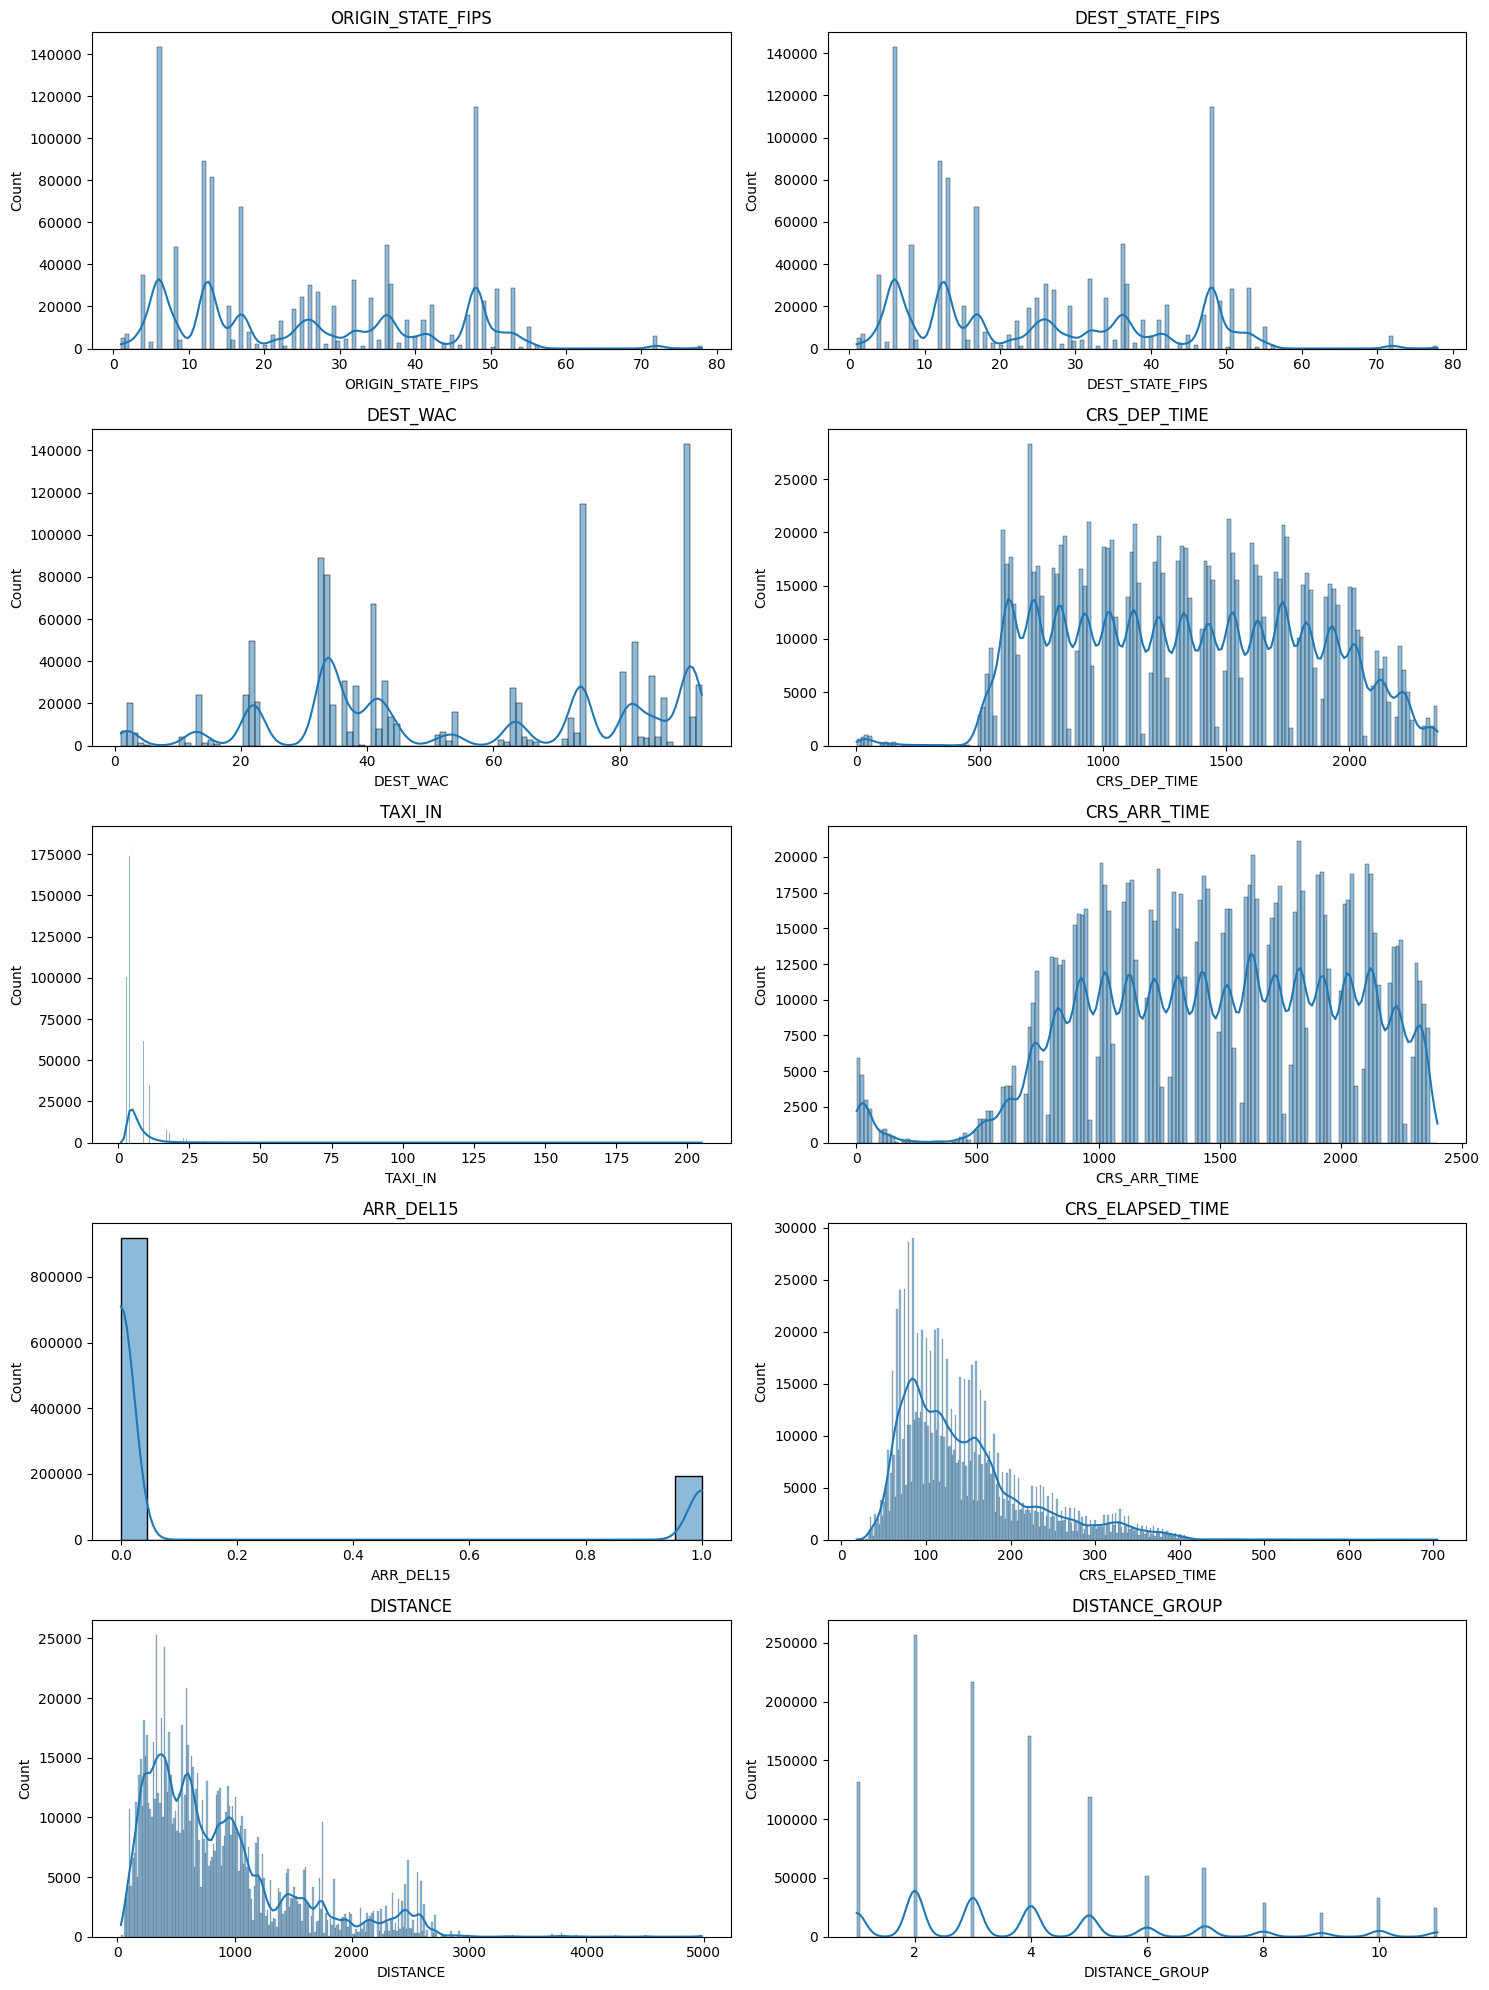

In [24]:
# Select float columns only
float_cols = df.select_dtypes('float').columns

# Set cols per row
n_cols = 2

# Compute necessary row
n_rows = -(-len(float_cols) // n_cols)

# Set grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Set axes as 1D
axes = axes.flatten()

# Loop on each axes and columns
for ax, col in zip(axes, float_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

ORIGIN_STATE_FIPS :
- Les vols sont répartis entre plusieurs états d’origine identifiés par leur code FIPS.
- On observe quelques pics marqués, notamment autour des codes 6, 12, 36, 48. Cela correspond probablement aux États avec les aéroports les plus fréquentés (ex. : Californie, Floride, New York, Texas).
- La distribution est très inégale, ce qui reflète une concentration du trafic aérien dans quelques États clés.

DEST_STATE_FIPS :
- Comme pour l’origine, certains codes d’États de destination sont nettement plus représentés que d’autres.
- Le schéma est similaire à celui de l’origine, avec des pics fréquents sur les mêmes États. Cela reflète les principales routes.
- Très peu de vols vont vers les États peu peuplés ou périphériques.

DEST_WAC :
- La variable DEST_WAC (World Area Code) est aussi très concentrée sur certaines valeurs.
- On retrouve plusieurs pics nets (notamment autour de 40, 50, 80), ce qui peut refléter des regroupements régionaux (ex : zones Ouest, Sud-Est, etc.).
- La répartition est hétérogène, certains codes sont très rares voire absents.

CRS_DEP_TIME :
- La majorité des vols sont prévus entre 500 (5h00) et 2100 (21h00).
- On voit des pics réguliers toutes les 100–200 unités, correspondant à des plages horaires de départ classiques (matin, midi, soir).
- Il y a très peu de vols planifiés pendant la nuit (entre 0h et 5h), ce qui crée un creux marqué.

TAXI_IN :
- Une grande majorité des vols ont un temps de roulage à l’arrivée (TAXI_IN) inférieur à 15 minutes.
- Quelques cas extrêmes dépassent les 50 voire 100 minutes, mais ils sont très rares.
- Cela reflète un phénomène classique : la majorité des aéroports ont un temps de roulage stable et court, avec des exceptions sur de grands hubs ou en cas de congestion.

CRS_ARR_TIME :
- Les heures d’arrivée prévues (CRS_ARR_TIME) sont également concentrées entre 500 et 2300, avec des pics prononcés en matinée et en fin d’après-midi.
- Le creux entre minuit et 5h reflète une très faible activité nocturne.
- La distribution est modulaire, ce qui correspond au fonctionnement par plages horaires programmées.

ARR_DEL15 :
- La variable cible (ARR_DEL15) est fortement déséquilibrée : la majorité des vols ne sont pas en retard (valeur 0).
- Seule une minorité de vols ont un retard à l’arrivée ≥ 15 minutes (valeur 1).
- Cette distribution binaire montre clairement qu’on a un problème de classification déséquilibré, ce qu’il faudra prendre en compte dans la modélisation (ex. : pondération, sur-échantillonnage, etc.).

CRS_ELAPSED_TIME :
- La durée prévue des vols (CRS_ELAPSED_TIME) est concentrée entre 60 et 200 minutes.
- Il existe des vols plus longs (jusqu’à 700 minutes), mais ils sont beaucoup plus rares.

DISTANCE :
- La majorité des vols couvrent une distance inférieure à 1500 km, avec un pic autour de 500 à 1000 km.
- Comme pour la durée prévue, la distribution présente quelques vols très longs (jusqu’à 5000 km).
- La forme générale suggère une distribution asymétrique, concentrée sur les distances moyennes typiques des vols domestiques.

DISTANCE_GROUP :
- La variable DISTANCE_GROUP classe les vols par tranches de distance (par exemple : 1 = < 250 km, 2 = 250–500 km, etc.).
- Le pic le plus élevé est sur le groupe 3, ce qui correspond à une distance moyenne (~500–750 km).
- Les groupes les plus fréquents sont les groupes 2 à 6, ce qui confirme la forte concentration sur les vols court et moyen-courrier. 

---

##### VARIABLES QUALITATIVES (object)

On commence par afficher toutes les valeurs uniques de nos variables qualitatives pour se faire une idée du contenu de notre jeu de données

In [25]:
for col in df.select_dtypes('object'):
    print(f"\n{col} (n = {df[col].nunique()}):")
    for val in sorted(df[col].dropna().unique()):
        print(f"  - {val}")


UNIQUE_CARRIER (n = 12):
  - AA
  - AS
  - B6
  - DL
  - EV
  - F9
  - HA
  - NK
  - OO
  - UA
  - VX
  - WN

ORIGIN (n = 308):
  - ABE
  - ABI
  - ABQ
  - ABR
  - ABY
  - ACK
  - ACT
  - ACV
  - ACY
  - ADK
  - ADQ
  - AEX
  - AGS
  - AKN
  - ALB
  - AMA
  - ANC
  - APN
  - ASE
  - ATL
  - ATW
  - AUS
  - AVL
  - AVP
  - AZO
  - BDL
  - BET
  - BFL
  - BGM
  - BGR
  - BHM
  - BIL
  - BIS
  - BJI
  - BLI
  - BMI
  - BNA
  - BOI
  - BOS
  - BPT
  - BQK
  - BQN
  - BRD
  - BRO
  - BRW
  - BTM
  - BTR
  - BTV
  - BUF
  - BUR
  - BWI
  - BZN
  - CAE
  - CAK
  - CDC
  - CDV
  - CHA
  - CHO
  - CHS
  - CID
  - CIU
  - CLE
  - CLL
  - CLT
  - CMH
  - CMX
  - COD
  - COS
  - CPR
  - CRP
  - CRW
  - CSG
  - CVG
  - CWA
  - DAB
  - DAL
  - DAY
  - DCA
  - DEN
  - DFW
  - DHN
  - DLG
  - DLH
  - DRO
  - DSM
  - DTW
  - DVL
  - EAU
  - ECP
  - EGE
  - EKO
  - ELM
  - ELP
  - ERI
  - ESC
  - EUG
  - EVV
  - EWN
  - EWR
  - EYW
  - FAI
  - FAR
  - FAT
  - FAY
  - FCA
  - FLG
  - FLL
  - FNT
  - FSD

Puis on affiche le tout dans des histogrammes pour voir s'il y a des éléments importants à noter.

Attention, certaines colonnes ont des types sous-représentés. On fait le choix d'afficher que les plus importants pour rendre les histogrammes plus lisibles

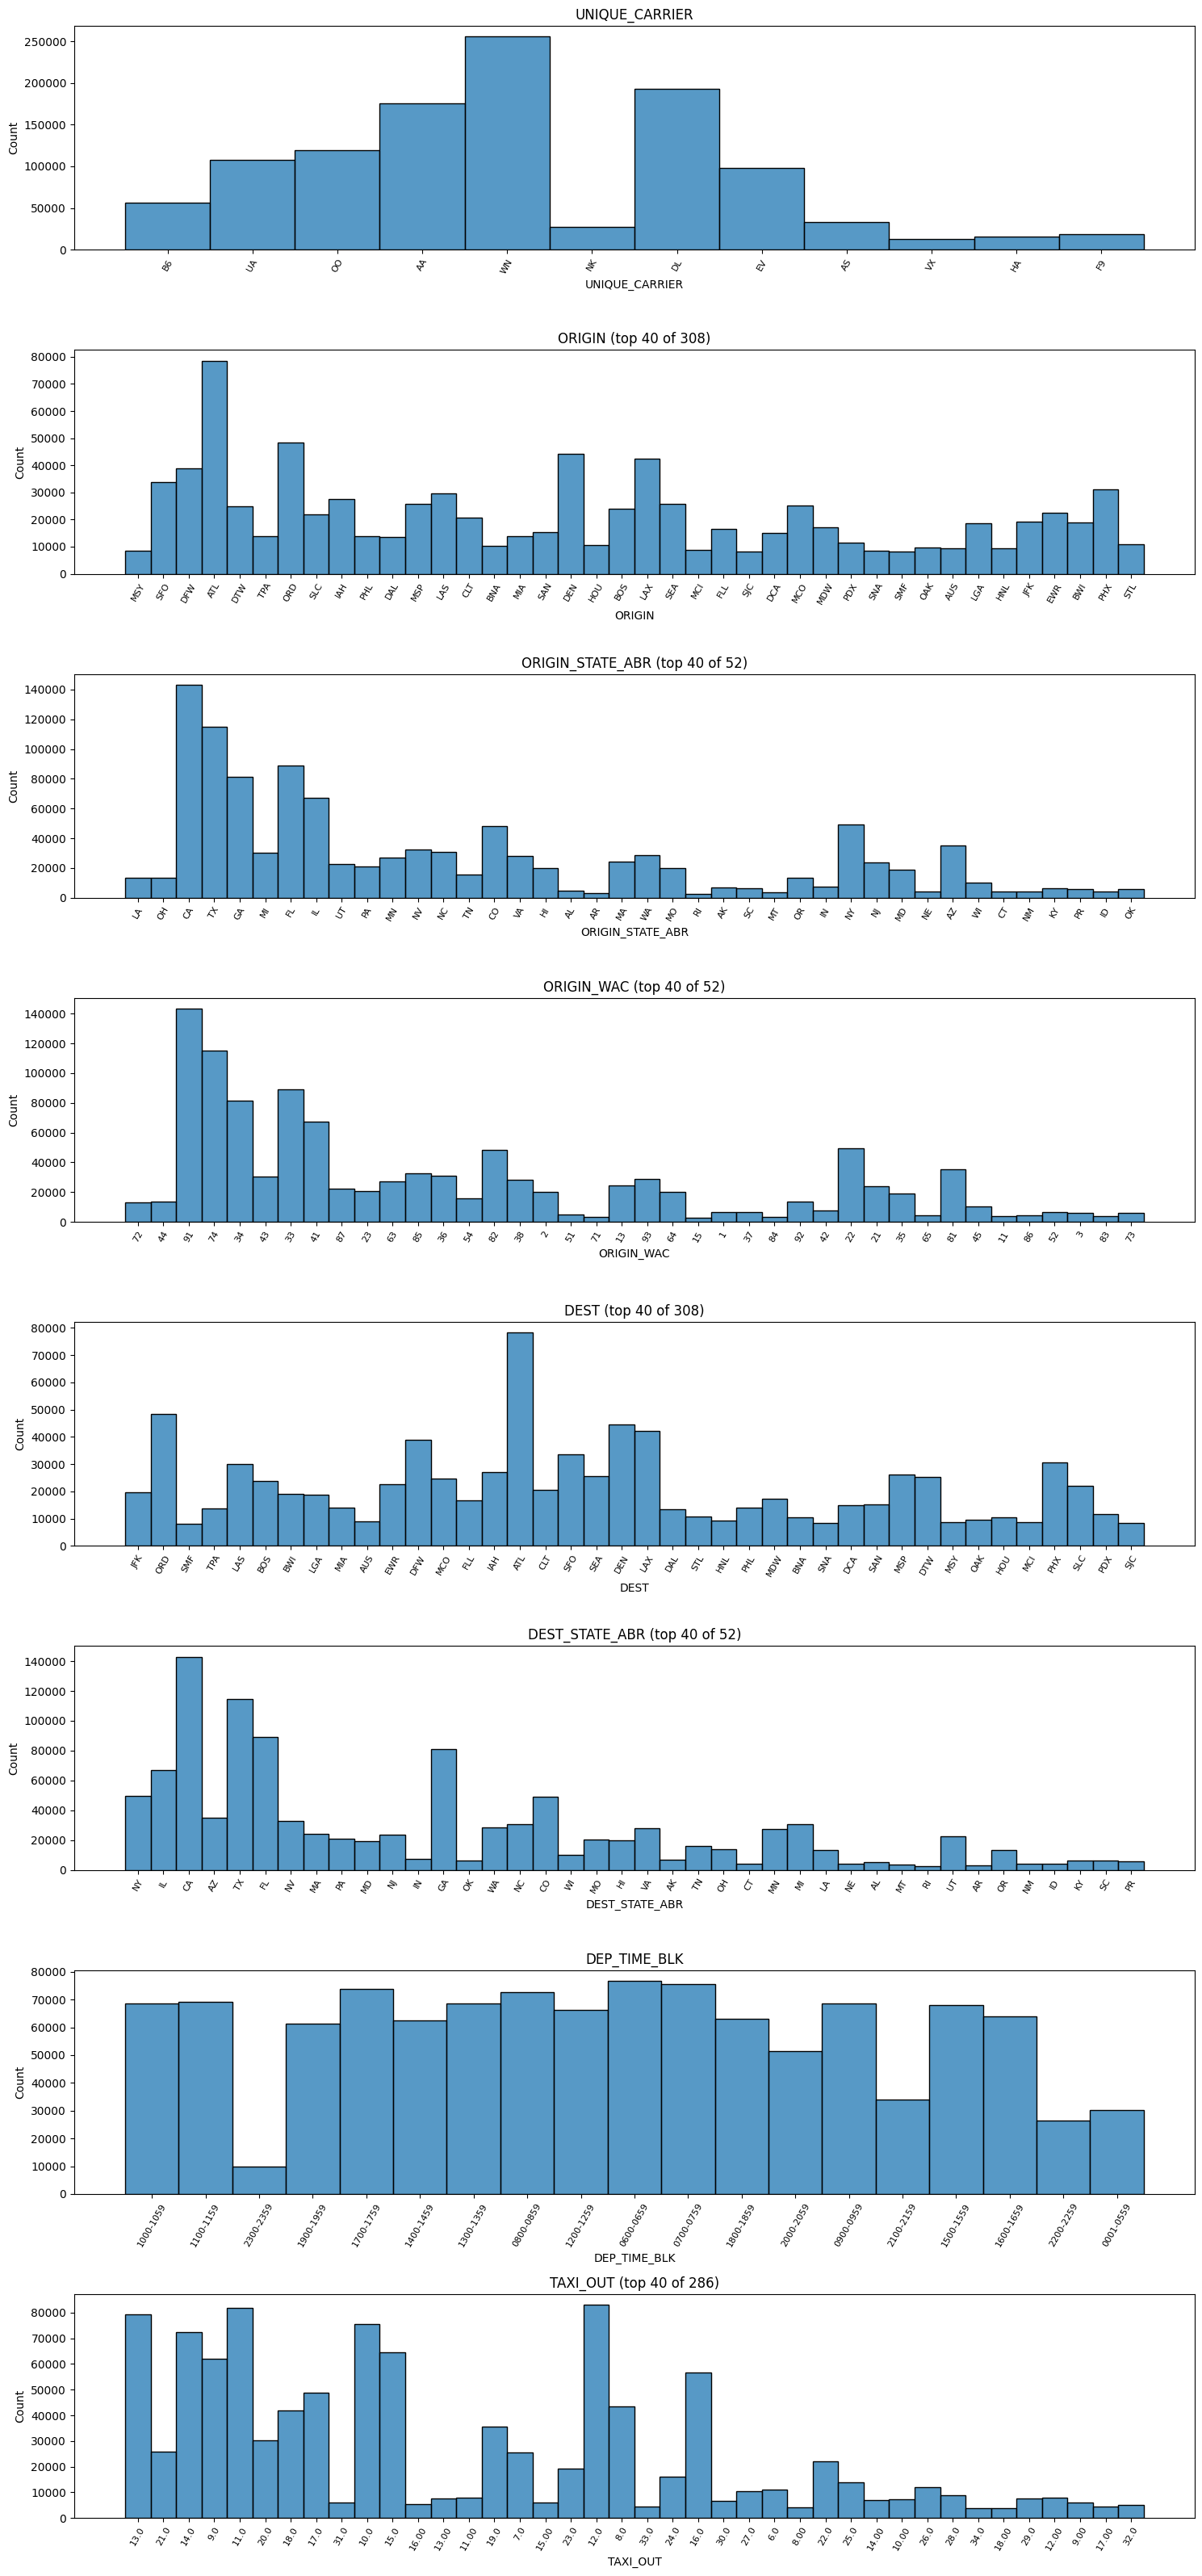

In [26]:
# Parameters
top_n_threshold = 50   # If a column has more than this number of unique values, it will be truncated
top_n = 40             # Number of top categories to display if too many unique values

# Select object-type (categorical) columns
cat_cols = df.select_dtypes('object').columns

# Grid configuration
n_cols = 1
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop over each categorical column and axis
for ax, col in zip(axes, cat_cols):
    nb_unique = df[col].nunique()
    
    # If too many unique categories, filter to top N
    if nb_unique > top_n_threshold:
        top_values = df[col].value_counts().nlargest(top_n).index
        data = df[df[col].isin(top_values)]
        sns.histplot(data[col], ax=ax, kde=False)
        ax.set_title(f"{col} (top {top_n} of {nb_unique})")
    else:
        sns.histplot(df[col], ax=ax, kde=False)
        ax.set_title(col)

    # Improve X-axis readability
    ax.tick_params(axis='x', labelrotation=60, labelsize=8)

plt.tight_layout()
plt.show()

UNIQUE_CARRIER :

- La variable UNIQUE_CARRIER représente l'identifiant unique de la compagnie aérienne.
- La distribution montre une forte concentration autour de quelques compagnies, notamment les plus grosses compagnies nationales comme WN, DL, AA.
- Les compagnies les moins représentées n’ont que très peu de vols dans l’échantillon, ce qui pourrait poser un problème de généralisation ou de déséquilibre dans les catégories.

ORIGIN (top 40 of 308) :
- Il y a 308 aéroports d’origine uniques, mais le graphique n’affiche que les 40 plus fréquents.
- Quelques aéroports comme ATL, ORD, DFW, DEN, CLT, etc., ont une forte densité de vols, ce qui est attendu (hubs majeurs).
- Grande diversité d’aéroports avec peu de trafic, ce qui peut nécessiter une encodage spécial (regroupement)

ORIGIN_STATE_ABR (top 40 of 52) :
- Affiche la répartition des vols selon l’état d’origine (abréviation).
- Les États comme CA, TX, FL, GA, IL dominent largement, ce qui est cohérent avec les hubs majeurs et les États très peuplés.
- Contrairement à ORIGIN, cette variable est plus stable et agrégée, donc plus facile à encoder et souvent préférable si on veut réduire la granularité.

ORIGIN_WAC (top 40 of 52) :
- La variable ORIGIN_WAC représente un code de zone géographique standardisé (World Area Code).
- Certaines zones (ex. : 74, 84, 70…) concentrent une très forte densité de départs, ce qui reflète leur importance géographique ou économique.
- Peut être utile pour ajouter une dimension régionale

DEST (top 40 of 308) :
- Il y a 308 aéroports de destination, mais seuls les 40 plus fréquents sont affichés.
- Les aéroports comme ATL, ORD, DFW, DEN apparaissent comme principaux hubs de destination, très cohérents avec le trafic observé au départ.
- Cette variable a une forte granularité

DEST_STATE_ABR (top 40 of 52) :
- Représente l’abréviation de l’État de destination.
- Les États les plus représentés (CA, TX, FL, GA, etc.) sont également ceux avec de grands hubs ou une population élevée.

DEP_TIME_BLK :
- Cette variable représente la plage horaire prévue de départ (ex : 0600-0659).
- La distribution est relativement homogène entre 06h00 et 22h00, avec des creux évidents pendant la nuit (0001-0559).
- Cela reflète bien les créneaux typiques d’exploitation aérienne, avec peu de vols nocturnes, et des pics entre matinée et début de soirée.
- C’est une variable très pertinente, notamment pour capter les effets liés à la congestion ou à l’organisation des vols.

TAXI_OUT (top 40 of 286) :
- Cette variable représente le temps de roulage entre la porte et le décollage, en minutes.
- La majorité des valeurs se situent entre 5 et 25 minutes, avec des pics nets à 15, 10, 5 et 20 minutes, ce qui est typique des grands aéroports bien organisés.
- Au-delà de 40-50 minutes, les occurrences chutent fortement : ces cas correspondent probablement à des retards au sol ou congestions exceptionnelles.
- Des valeurs extrêmes jusqu’à plus de 150 minutes sont présentes, mais très rares, et peuvent être traitées comme outliers.
- Cette variable est pertinente pour la prédiction du retard à l’arrivée car un long roulage initial peut signaler des problèmes en cascade (congestion, retard en chaîne…).

---

##### CORRELATION

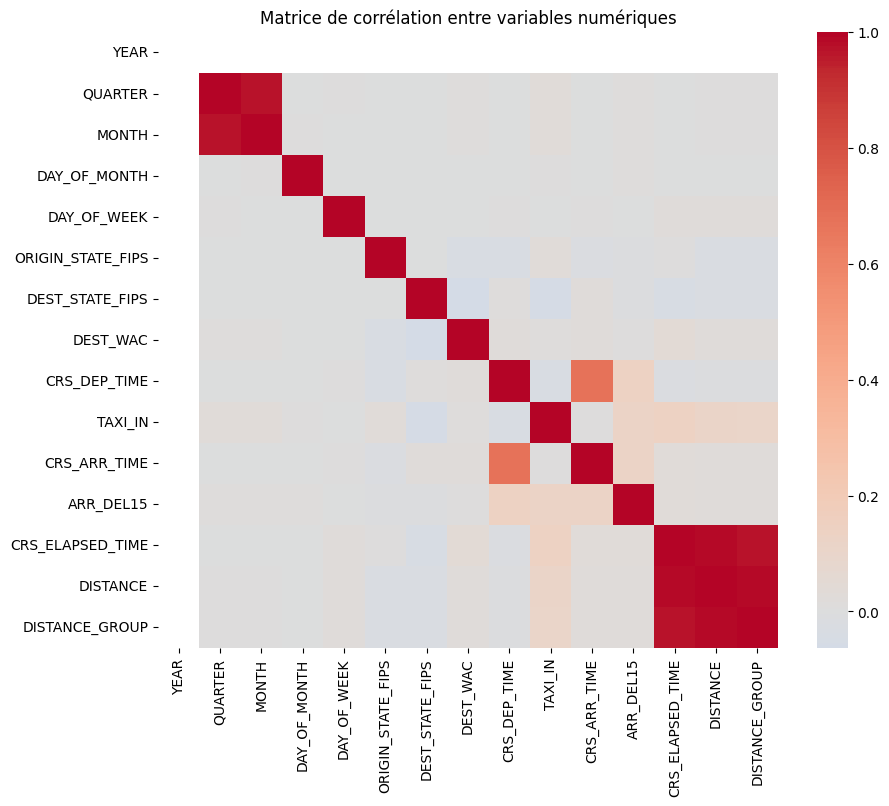

In [52]:
num_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", center=0)
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

Affiche une heatmap colorée qui montre les relations entre les variables.

- 🔴 Corrélation proche de 1 : relation linéaire positive forte
- 🔵 Corrélation proche de -1 : relation linéaire négative forte
- ⚪ Corrélation proche de 0 : relation faible ou inexistante

Ce que l'on remarque :
 - DISTANCE / DISTANCE_GROUPE / CRS_ELAPSED_TIME : Varient ensemble ce qui est logique. Plus un vol est long, plus sa durée/distance prévue l’est aussi (>0.8)
 - CRS_ARR_TIME / ARR_DEL15 : Les horaires d’arrivée prévus influencent modérément le retard. Peut refléter une heure de la journée critique. (~0.35)
 - CRS_DEP_TIME / ARR_DEL15 : Plage horaire de départ également influencent modérément le retard (déjà observé dans l'analyse précédente). (~0.25)

---

### 5.HYPOTHÈSES

#### H1 : Retards selon la plage horaire de départ (DEP_TIME_BLK)

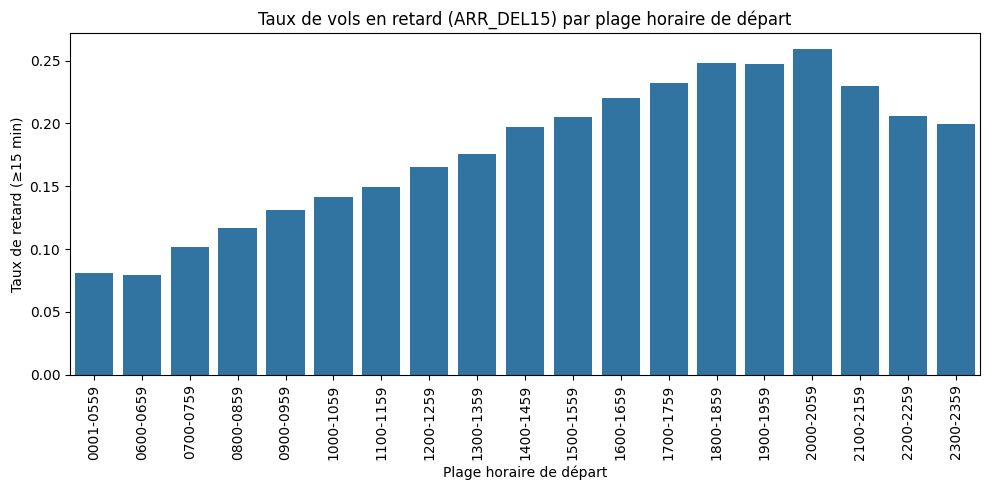

In [48]:
delay_by_blk = df.groupby('DEP_TIME_BLK')['ARR_DEL15'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=delay_by_blk,
    x='DEP_TIME_BLK',
    y='ARR_DEL15'
)
plt.title("Taux de vols en retard (ARR_DEL15) par plage horaire de départ")
plt.ylabel("Taux de retard (≥15 min)")
plt.xlabel("Plage horaire de départ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle la plage horaire a un impact sur le retard est validée.

- Taux de retard (ARR_DEL15) varie fortement selon les plages horaires.
  - Plus élevé en fin de journée (de 16h à 23h59).
  - À l'inverse, les vols tôt le matin (de 06h00 à 09h00) présentent les taux de retard les plus faibles.

#### H2 : Taux de retard par compagnie (UNIQUE_CARRIER)

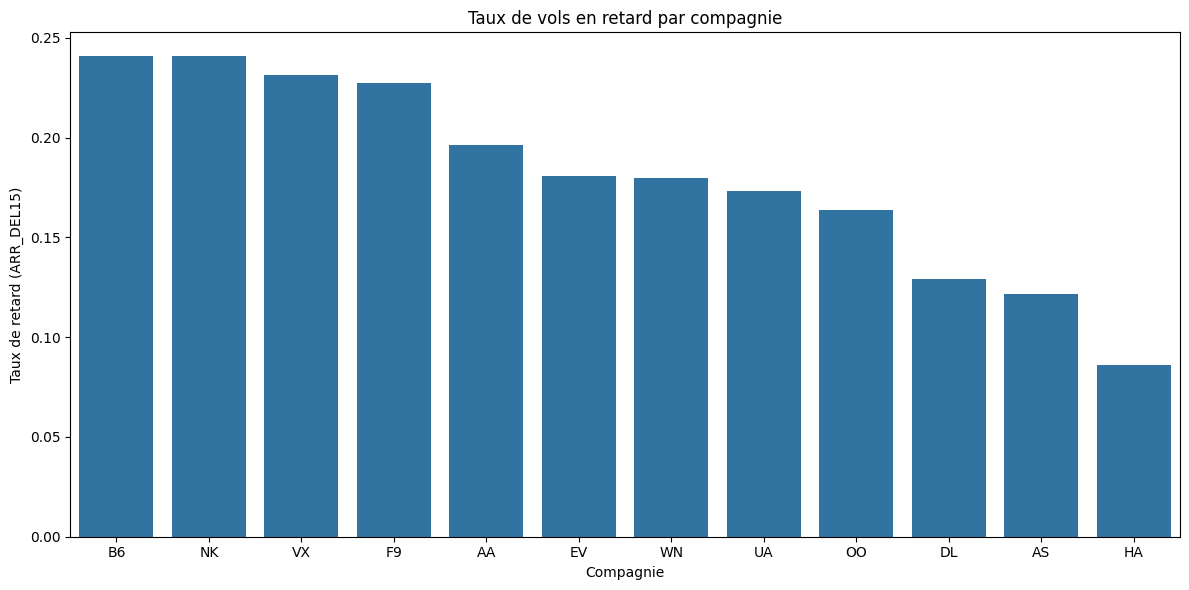

In [28]:
carrier_delay = df.groupby('UNIQUE_CARRIER')['ARR_DEL15'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=carrier_delay,
    x='UNIQUE_CARRIER',
    y='ARR_DEL15',
)
plt.title("Taux de vols en retard par compagnie")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.xlabel("Compagnie")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle la compagnie impacte le retard à l'arrivée est validé

On observe une variation nette entre les compagnies :
- NK (Spirit Airlines) dépasse 30 % de vols en retard.
- À l’opposé, HA (Hawaiian Airlines) est sous les 10 %.
- L’écart entre la meilleure et la pire compagnie est significatif (~20 points).

#### H3 : Taux de retard par aéroport d’origine (ORIGIN)

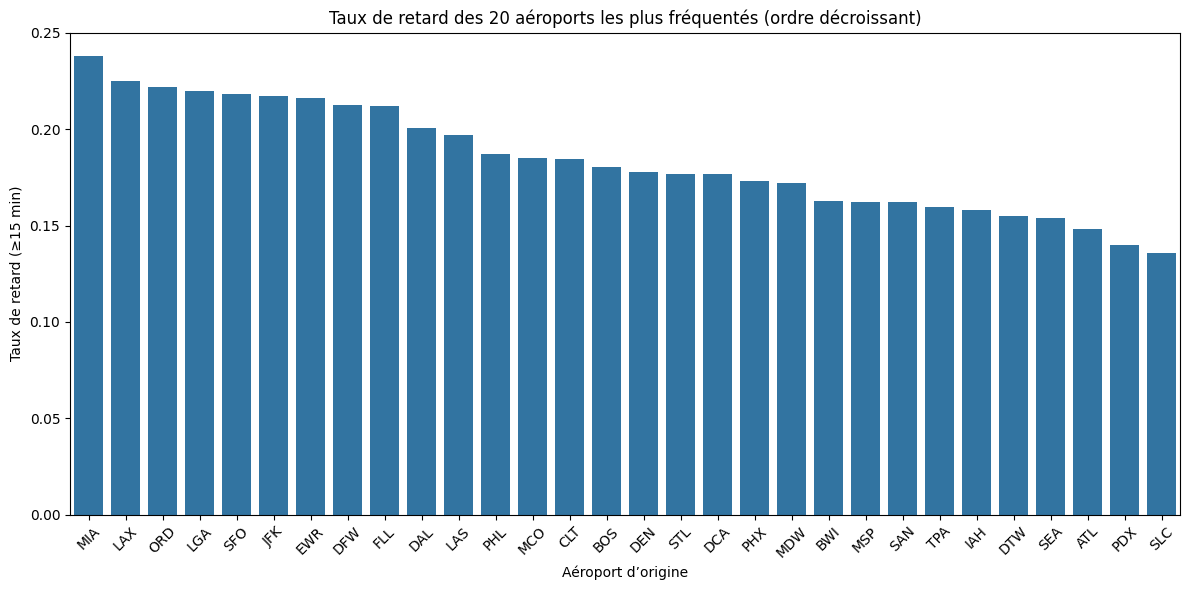

In [44]:
top_airports = df['ORIGIN'].value_counts().nlargest(30).index

airport_delay = (
    df[df['ORIGIN'].isin(top_airports)]
    .groupby('ORIGIN')['ARR_DEL15']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=airport_delay.index, 
    y=airport_delay.values
)
plt.title("Taux de retard des 20 aéroports les plus fréquentés (ordre décroissant)")
plt.ylabel("Taux de retard (≥15 min)")
plt.xlabel("Aéroport d’origine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle l'aéroport d'origine impacte le retard à l'arrivée est validé

- On observe une variations entre les aéroports :

  - MLA atteint près de 25 % de vols retardés.
  - D’autres comme ATL (Atlanta) ou IAH (Houston) sont sous les 15 %.

- L'écart entre les extrêmes est d’environ 10 points, ce qui est significatif en aviation.

#### H4 : Taux de retard selon le jour de la semaine

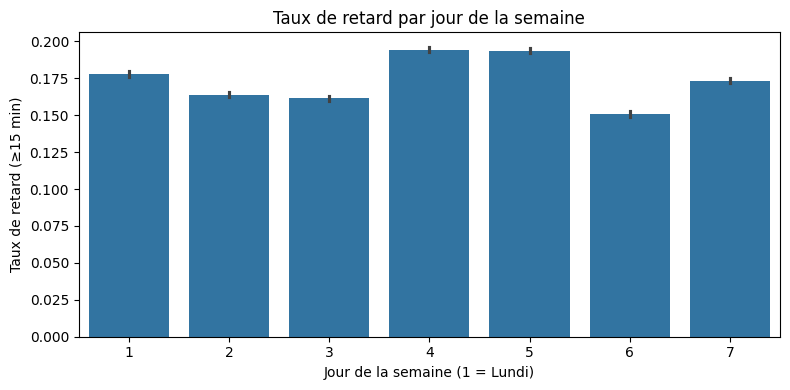

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df, 
    x='DAY_OF_WEEK', 
    y='ARR_DEL15'
)
plt.title('Taux de retard par jour de la semaine')
plt.ylabel('Taux de retard (≥15 min)')
plt.xlabel('Jour de la semaine (1 = Lundi)')
plt.tight_layout()
plt.show()


Selon le graphique ci-dessus, l’hypothèse selon laquelle la plage horaire d’arrivée impacte le retard à l'arrivée est validé

On observe :

- Des pics de retard entre :

  - 20h00–22h59 (~21 %)
  - 23h00–00h59 (~20 %)

- Des creux sur les créneaux matinaux :
  
  - 06h00–07h59 (~10 %)
  - 08h00–09h59 (~12–13 %)

- Les vols du soir sont plus sujets aux retards : probable effet d’accumulation des retards tout au long de la journée.
- Les vols du matin sont plus ponctuels : la chaîne d’exploitation démarre "propre", sans effet domino.

#### H5 : Taux de retard selon le mois

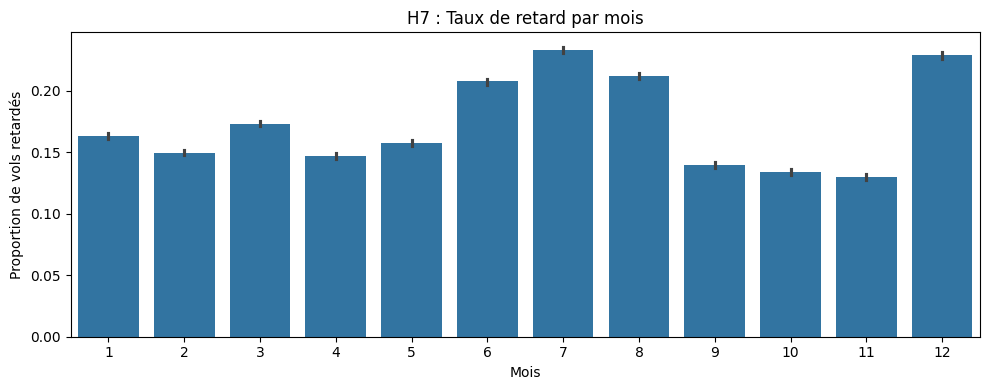

In [47]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='MONTH', y='ARR_DEL15')
plt.title('H7 : Taux de retard par mois')
plt.ylabel('Proportion de vols retardés')
plt.xlabel('Mois')
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle le mois de l'année impacte le retard à l'arrivée est validé

On observe des variations claires du taux de retard (ARR_DEL15) selon les mois :
- Juillet (7) et décembre (12) ont les taux de retard les plus élevés (≈ 23%).
- Septembre (9), octobre (10) et novembre (11) ont les taux les plus bas (≈ 13%).

#### H6 : Plus la distance d’un vol est grande, plus il a de risques d’être en retard

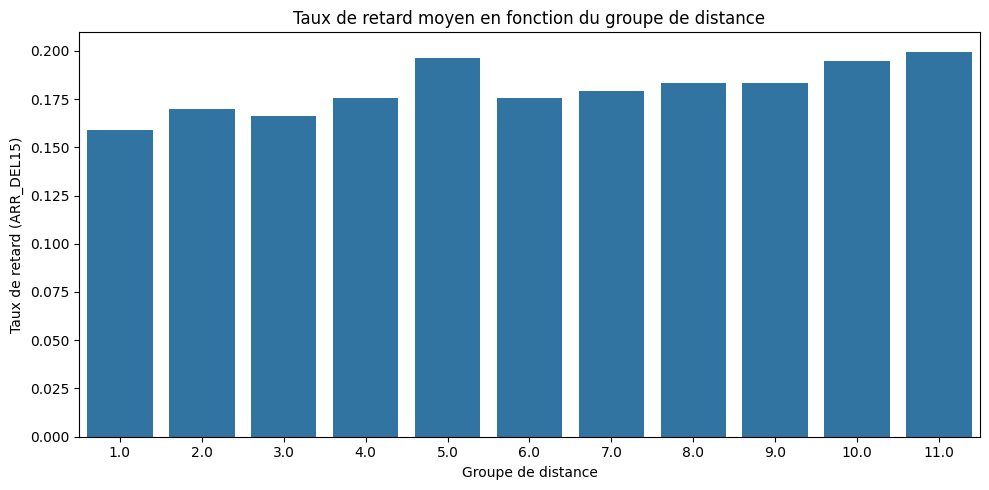

In [32]:
delay_by_distance = df.groupby('DISTANCE_GROUP')['ARR_DEL15'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=delay_by_distance.index, y=delay_by_distance.values)
plt.title("Taux de retard moyen en fonction du groupe de distance")
plt.xlabel("Groupe de distance")
plt.ylabel("Taux de retard (ARR_DEL15)")
plt.tight_layout()
plt.show()

Selon le graphique ci-dessus, l’hypothèse selon laquelle plus la distance d’un vol est grande, plus il a de risques d’être en retard est partiellement validé


- On observe une légère augmentation du taux de retard avec la distance du vol (4% de variation). Cependant, cela reste faible comparé à d'autres facteurs comme l’heure de départ ou l’aéroport.

---

### EXPORT DU CSV

Supprime les outiliers

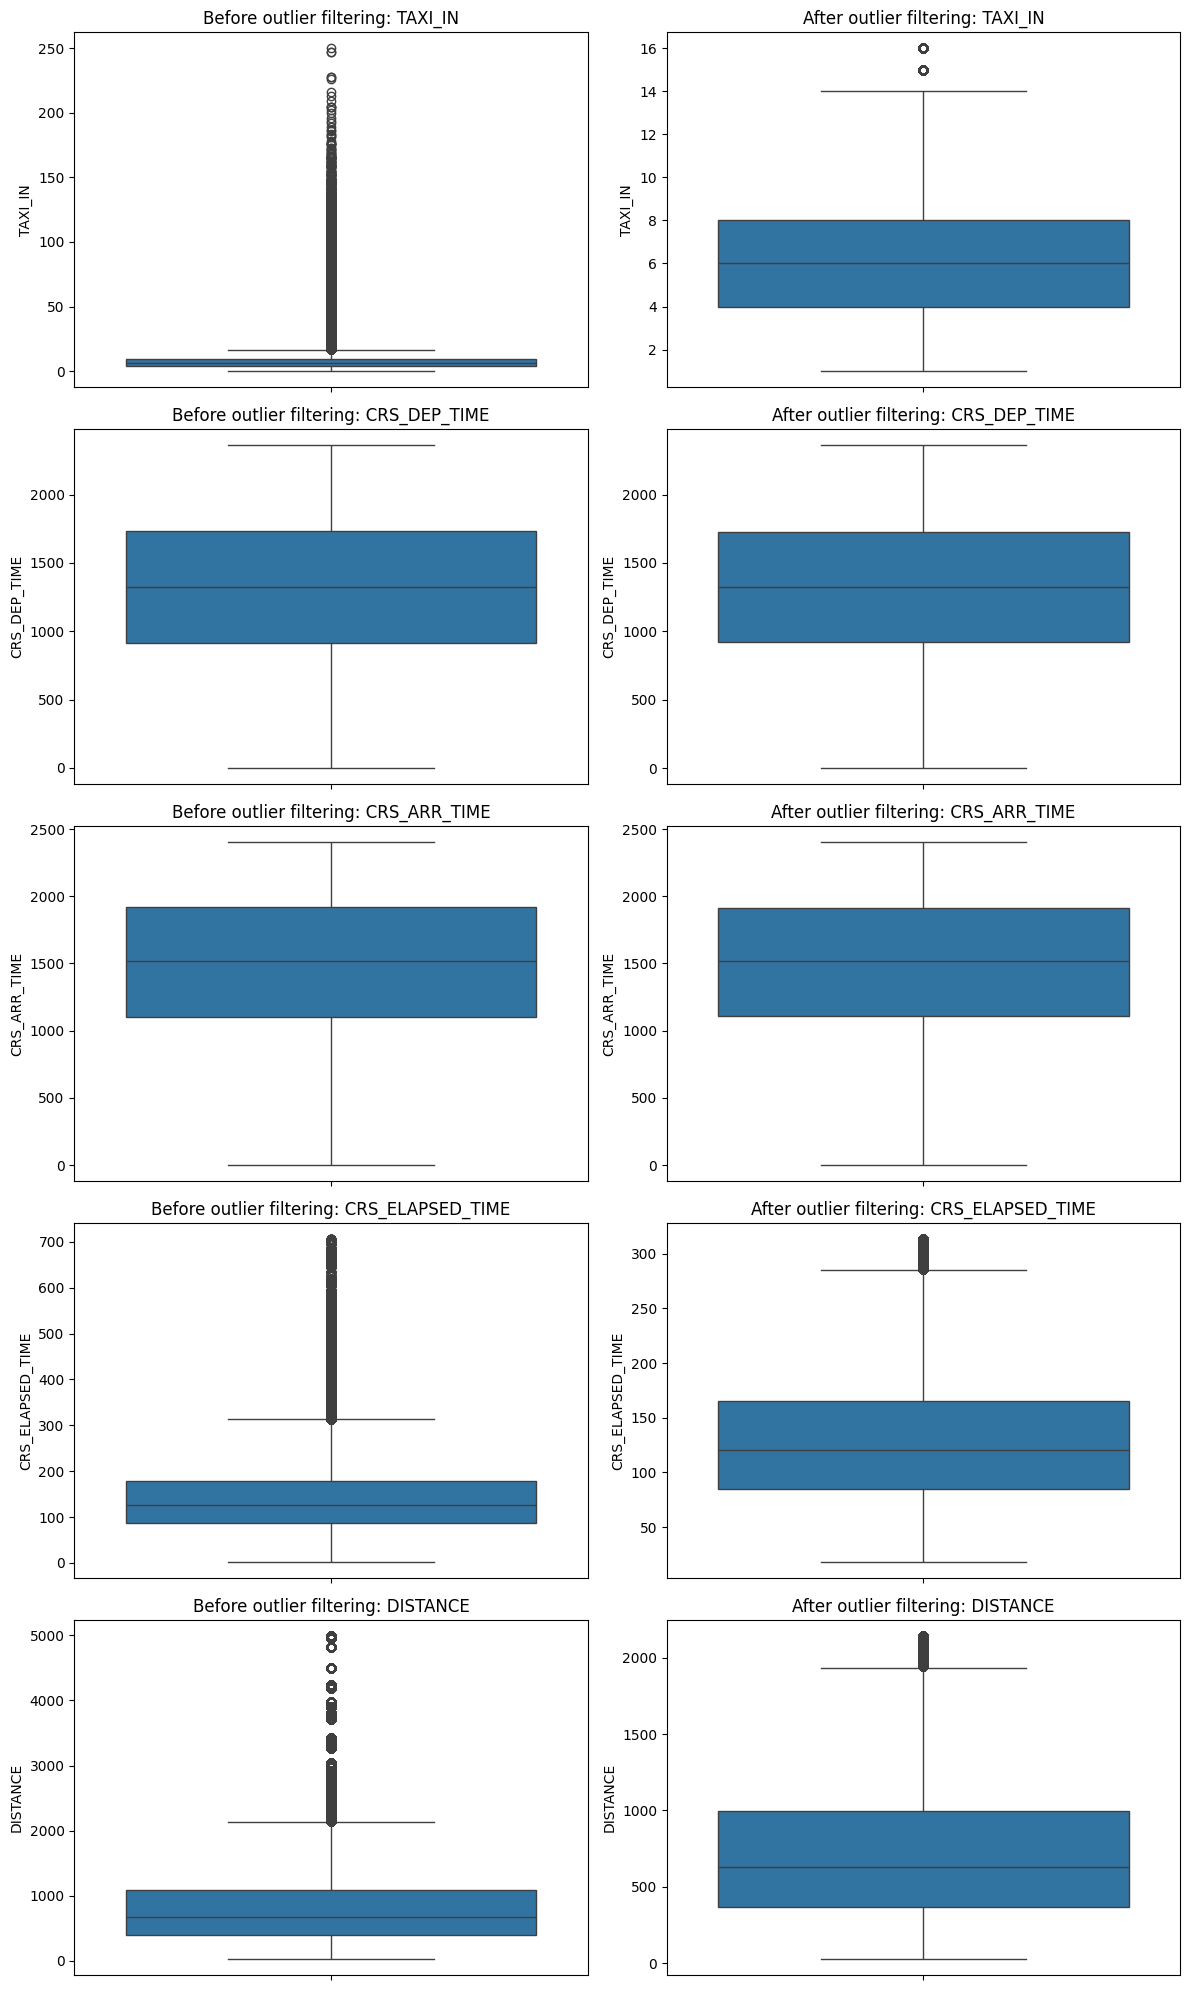

In [33]:
def outliners_filter(df, col: str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[col] >= lower_bound) & (df[col] <= upper_bound)

# 2. Select columns to filter
columns_to_filter = [
    'TAXI_IN',
    'CRS_DEP_TIME',
    'CRS_ARR_TIME',
    'CRS_ELAPSED_TIME',
    'DISTANCE'
]

# 3. Compute global mask and filtered DataFrame
global_mask = pd.Series(True, index=full_df.index)
for col in columns_to_filter:
    if col in full_df.columns:
        global_mask &= outliners_filter(full_df, col)

filtered_df = full_df[global_mask]

# 4. Plot boxplots before/after side by side
n = len(columns_to_filter)
fig, axes = plt.subplots(n, 2, figsize=(12, 4 * n))

for i, col in enumerate(columns_to_filter):
    if col in full_df.columns:
        sns.boxplot(y=full_df[col], ax=axes[i, 0])
        axes[i, 0].set_title(f"Before outlier filtering: {col}")
        
        sns.boxplot(y=filtered_df[col], ax=axes[i, 1])
        axes[i, 1].set_title(f"After outlier filtering: {col}")

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("data/processed/cleaned_data.csv", index=False)